<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />


Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

<hr style="border-top: 1px solid #001a79;" />

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Creating a array of values for X using Numpy
x = np.arange(-5,6,1)
x

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [4]:
# Y function for the absolute value
y = abs(x)
y

array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5])

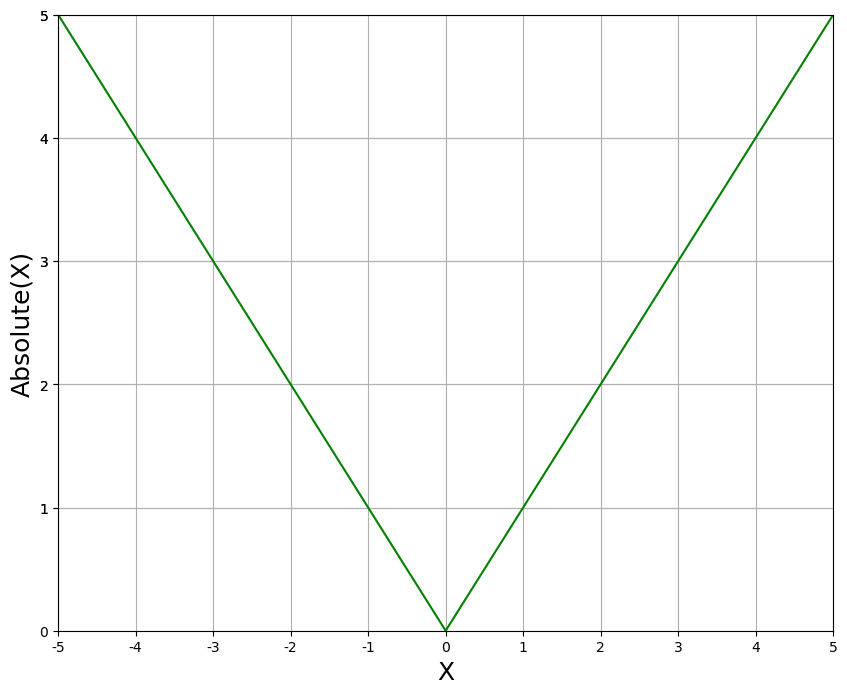

In [5]:
# Creating the plot for the absolute function.

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(x,y,"g-")
plt.xlabel("X", size="18")
plt.ylabel("Absolute(X)", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot
plt.xlim(left=x[0], right=x[-1])
plt.ylim(bottom=0, top=y[-1])

# Making it easier to see when value of Y for each X
plt.xticks(x,x)
plt.yticks(y,y)
plt.show()

Regarding the reason of why absolute functions are not used is because of the difficulties that mathematicianshave when using derivatives while working with absloute values
<b>Reference:</b> https://www.bradthiessen.com/html5/docs/ols.pdf - Page 4

<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />


Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

```python
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
```

<hr style="border-top: 1px solid #001a79;" />

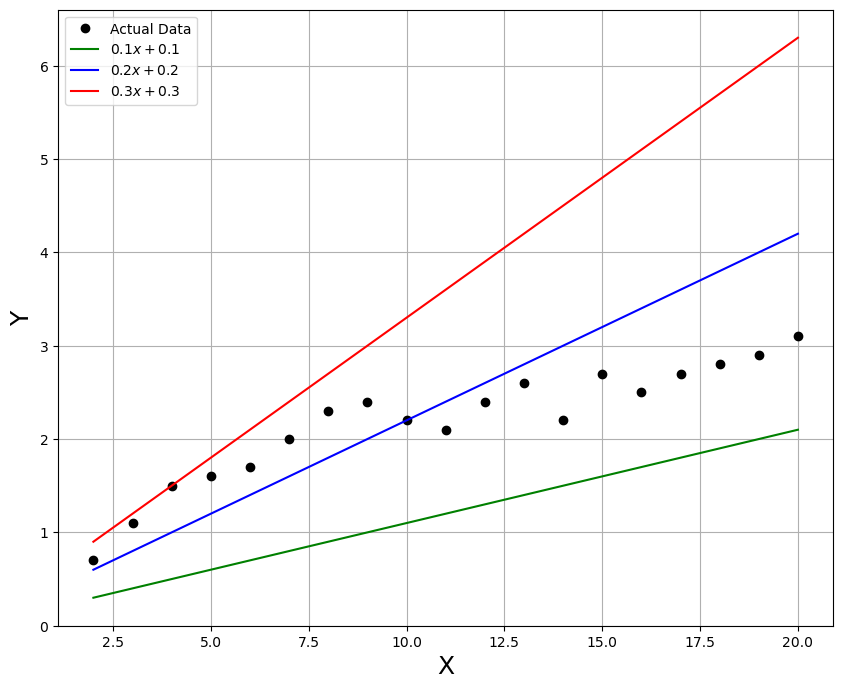

In [6]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

#Converting to Numpy arrays to use in the calculations bellow
x = np.array(x)
y = np.array(y)


#Actual values of X and Y

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(x,y,"ko", label=r"Actual Data")
plt.xlabel("X", size="18")
plt.ylabel("Y", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot



#Plotting different lines to to try to find the best one

plt.plot(x,(0.1 * x)+ 0.1,"g-", label=r"$0.1x + 0.1$")
plt.plot(x,(0.2 * x)+ 0.2,"b-", label=r"$0.2x + 0.2$")
plt.plot(x,(0.3 * x)+ 0.3,"r-", label=r"$0.3x + 0.3$")

plt.legend()

plt.show()

As we can see in the plot above, the best of the tree lines above, seems to be the blue one. To be sure of that we are going to calculate the cost of each one of them, to see which one has the smaller cost.

The formula to calculate the cost of each model is 
$$ \sum_i (y_i - mx_i - c)^2 $$

In [59]:
# Calculate the cost of the lines above for the data above.



cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])


print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.1, 0.1, cost(0.1, 0.1)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.2,  0.2, cost(0.2, 0.2)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.3, 0.3, cost(0.3, 0.3)))

Cost with m =  0.10 and c =  0.10:    19.45
Cost with m =  0.20 and c =  0.20:     7.27
Cost with m =  0.30 and c =  0.30:    61.21


<h3 style="color: rgb(0, 91, 94);">Minimizing the Cost</h3>

We still can improve, we can try to minimize the cost of the functions above. Using the three methods(Minimizing the cost, Optmization and Curve Fitting) to find the best line to fit the data points

To minimie the cost We first calculate the mean (average) values of our x values and that of our y values.
Then subtract the $x$ and $y$ mean found from each one of the values from $x$ and $y$
After that we take the dot product of the new  𝑥  values and the new  𝑦  values and divide it by the dot product of the new  𝑥  values with themselves. That will give us the best value for $m$

In [77]:
# Mean from x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Subtracting the means from x and y
x_minus_mean = x - x_mean
y_minus_mean = y - y_mean

# The best m is found by the following calculation.
m_analitic = np.sum(x_minus_mean * y_minus_mean) / np.sum(x_minus_mean * x_minus_mean)
# Use m from above to calculate the best c.
c_analitic = y_mean - m * x_mean

print("m is equal to %8.6f and c is equal to %6.6f." % (m_analitic, c_analitic))

m is equal to 0.103158 and c is equal to 1.049474.


The same result for m and c can be achieved by using the Numpy Polyfit Function

In [52]:
# This function takes x and y to find the best fitting line
result_poly = np.polyfit(x,y,1)
#Assigning the results to M and C
m_poly,c_poly = result_poly
print("m is is equal to %8.6f and c is is equal to %6.6f." % (m_poly,c_poly))


m is is equal to 0.103158 and c is is equal to 1.049474.


<h3 style="color: rgb(0, 91, 94);">Scipy.minimize</h3>

Another method to find the best values for m and c is to use the Minimize function from Scipy.module. This function takes at least two arguments, one is the function you want to minimize, in our case its going to be the cost function and the other argument is the guess for the values we want to find in this function, which is going to be $m$ and $c$.

$$ \sum_i (y_i - mx_i - c)^2 $$

In [75]:
# Creating a function for our cost function
# MC is a list containing the values of m and c respectively.
def cost(MC):
    m,c = MC
    # Writing down the our cost function
    cost = np.sum((y - m*x - c)**2)
    return cost

In [76]:
# Testing the function
cost((0.2,0.2))

7.270000000000001

Now that we know that our function is working we are going to use it inside the Minimize function from Scipy


In [65]:

# Passing our cost function and the guess values for m and c as argument.
result_minimize = so.minimize(cost, (2.0, 1.0))
result_minimize

      fun: 1.0395789473691177
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([4.47034836e-08, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [66]:
m_minimize, c_minimize = result_minimize.x
print("m is is equal to %8.6f and c is is equal to %6.6f." % (m_minimize, c_minimize))

m is is equal to 0.103158 and c is is equal to 1.049474.


As seen above, we got the same values for $m$ and $c$ as we got when using the polyfit function from Numpy

Lastly we are going to use the curve_fit from scipy.optimize to find the best values for $m$ and $c$. This function takes different arguments from the minimize one. As it can be seen here [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), and instead of using our cost function, this time we are going to use our model function, the f(x) function.

<h3 style="color: rgb(0, 91, 94);">Curve Fit</h3>

In [68]:
def f(x, m, c):
    return m * x + c

In [69]:
#The Scipy Optimize Curve Fit takes 3 arguments, the function we are trying to fit, the values for x and the values for y
import scipy.optimize as so

result_curve = so.curve_fit(f,x,y)
result_curve

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [71]:
m_curve,c_curve = result_curve[0]
print("m is is equal to %8.6f and c is is equal to %6.6f." % (m_curve,c_curve))

m is is equal to 0.103158 and c is is equal to 1.049474.


<h3 style="color: rgb(0, 91, 94);">Plotting</h3>

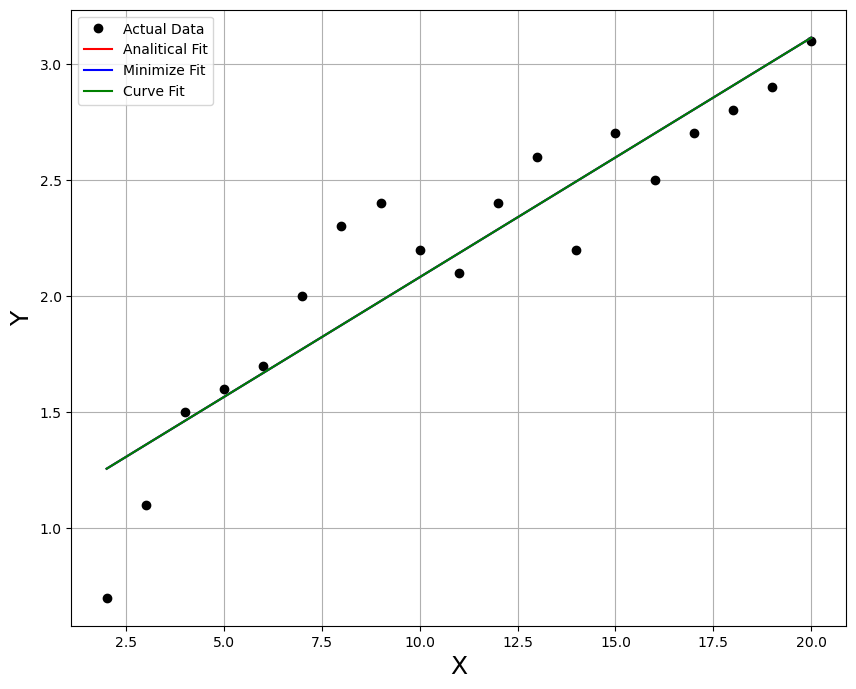

In [83]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

#Converting to Numpy arrays to use in the calculations bellow
x = np.array(x)
y = np.array(y)

# Minimize - Analitical data

plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(x,y,"ko", label=r"Actual Data")
plt.xlabel("X", size="18")
plt.ylabel("Y", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot

#Plotting different lines to to try to find the best one

plt.plot(x,(m_analitic * x)+ c_analitic,"r-", label=r"Analitical Fit")




# Minimize plot

plt.rcParams['figure.figsize'] = (10, 8)
plt.xlabel("X", size="18")
plt.ylabel("Y", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot

#Plotting different lines to to try to find the best one

plt.plot(x,(m_minimize * x)+ c_minimize,"b-", label=r"Minimize Fit")



# Curve Fit plot

plt.rcParams['figure.figsize'] = (10, 8)
plt.xlabel("X", size="18")
plt.ylabel("Y", size="18")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot

#Plotting different lines to to try to find the best one

plt.plot(x,(m_curve * x)+ c_curve,"g-", label=r"Curve Fit")

plt.legend()

plt.show()

As seen above,all the tree methods returned the same optimized line, the cost values are so similar that all the lines seems to be perfectly on to of eachother.

As for the question "Do you think a straight line is a good model for these points?". In my opinion it is since we are dealing with a linear function